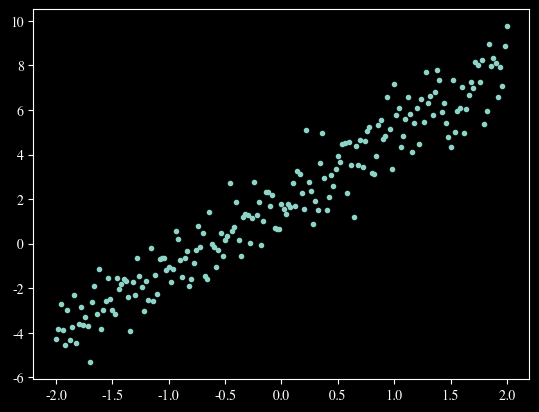

In [9]:
from cProfile import label
from statistics import mode

import tensorflow as tf
from matplotlib import pyplot as plt
# 设置matplotlib使用黑体显示中文
plt.rcParams['font.family'] = 'Times' # 设置字体

# 设定正确的权重和偏置 （一会想办法去把这两个参数去拟合出来)
TRUE_W = 3.0
TRUE_B = 2.0

# 指定数据数量
NUM_EXAMPLES = 201

x = tf.linspace(-2, 2, NUM_EXAMPLES)  # 生成-2到2之间的201个均匀分布的
x = tf.cast(x, tf.float32)  # 转换为float32类型

# 生成噪声数据
noise = tf.random.normal(shape=[NUM_EXAMPLES], mean=0.0, stddev=1.0)  # 添加噪声

# 定义一个函数
def f(x):
    return x * TRUE_W + TRUE_B

y = f(x) + noise  # 产生扰动后的y值
plt.plot(x, y, '.')  # 绘制数据点
plt.show()

In [19]:
class MyModel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        # 初始化权重和偏置 实际之中应该是随机的
        self.w = tf.Variable(tf.random.normal(shape=[]))  # 标量权重
        self.b = tf.Variable(tf.random.normal(shape=[]))  # 标量偏置

    # 定义前向计算
    def __call__(self, x):
        return self.w * x + self.b

model = MyModel()
# 打印模型参数
print(f'模型参数:{model.variables}')

模型参数:(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.91222787>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7052383>)


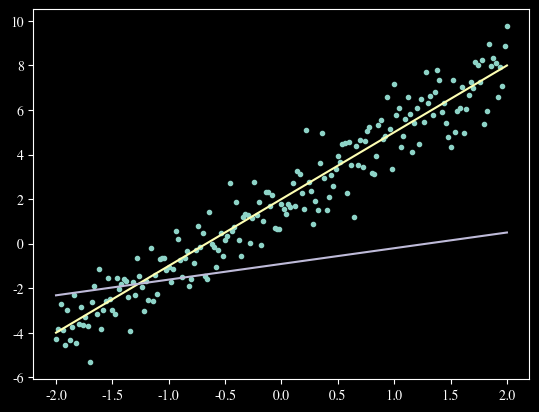

In [22]:
# 定义损失函数（均方误差）
def loss(y_true, y_pred):  # 参数是真实值和预测值 也可以叫做标签值和预测值（target_y,predicted_y）
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 被手动扰动过的值
plt.plot(x,y,".",label="数据")
# 真实值
plt.plot(x,f(x),label="真实值")
# 初始模型预测值
plt.plot(x,model(x),label="初始模型预测")
plt.show()

In [ ]:
# 定义训练模型